-----

-----

共享单车作为现代城市交通的一种补充手段，以其绿色低碳、打通公共交通“最后一公里”等特点，带来了当前国内交通领域内的一股新潮流。  
本次数据分析使用了狗熊会提供的美国芝加哥Divvy公共自行车站点及行程数据（其中站点数据截止2016年前两季度，行程数据涵盖2016年4月全月）。  

### **本次数据分析工作包含九个任务：**

-----

> 找到站点数据Divvy_Stations_2016_Q1Q2和行程数据Divvy_Trips_2016_04。读入样本数据，分别命名为station和trip。

In [20]:
# 载入分析中需要使用的包，并设置绘图环境
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['font.sans-serif'] = ["Dengxian","Whitney Book"]

In [21]:
# 调用pandas包，读取csv格式样本数据文件
station = pd.read_csv('./data/Divvy_Stations_2016_Q1Q2.csv',header=0)
trip = pd.read_csv('./data/Divvy_Trips_2016_04.csv',header=0)

-----

>将station表的online_date列转换为日期型，将trip表的starttime列和stoptime列分别转换为日期时间型。构造三个新列，分别为行程开始时间starttime的小时数，行程结束时间的小时数，行程开始时间增加10分钟得到的时间，分别命名为starttime_h，stoptime_h和t。统计数据概况，尝试解读结果，给出你的分析。

In [22]:
# 使用pandas中to_datetime方法，将文本列转换为时间日期型
station['online_date'] = pd.to_datetime(station['online_date'])
trip['starttime'] = pd.to_datetime(trip['starttime'])
trip['stoptime'] = pd.to_datetime(trip['stoptime'])

In [23]:
# 构造新列，并插入trip表中
trip.insert(2,'starttime_h',trip['starttime'].dt.hour) # pd.Series.dt.hour方法可以取得datetime型Series对象的小时数
trip.insert(4,'stoptime_h',trip['stoptime'].dt.hour)
trip.insert(5,'t',trip['starttime']+pd.Timedelta('00:10:00')) # 可以利用pd.Timedelta对时间进行加减操作，此处为行程开始时间统一加10分钟

In [24]:
# 确定数据已成功添加
trip.head(2)

,trip_id,starttime,starttime_h,stoptime,stoptime_h,t,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9379901,2016-04-30 23:59:00,23,2016-05-01 00:11:00,0,2016-05-01 00:09:00,21,733,123,California Ave & Milwaukee Ave,374,Western Ave & Walton St,Subscriber,Male,1982.0
1,9379900,2016-04-30 23:58:00,23,2016-05-01 00:07:00,0,2016-05-01 00:08:00,3583,556,349,Halsted St & Wrightwood Ave,165,Clark St & Grace St,Subscriber,Male,1991.0


### **行程数据概况**  
* 行程数据共包含**231635**条记录
* 每一条记录中包括**行程ID，单车ID，起始/结束时间，租车时长，起始站点，以及用户类别、性别、出生年**等信息。
* 年费用户的行程数据中，其用户信息包括出生年及性别信息；对于临时用户则没有这些信息

In [25]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231635 entries, 0 to 231634
Data columns (total 15 columns):
trip_id              231635 non-null int64
starttime            231635 non-null datetime64[ns]
starttime_h          231635 non-null int64
stoptime             231635 non-null datetime64[ns]
stoptime_h           231635 non-null int64
t                    231635 non-null datetime64[ns]
bikeid               231635 non-null int64
tripduration         231635 non-null int64
from_station_id      231635 non-null int64
from_station_name    231635 non-null object
to_station_id        231635 non-null int64
to_station_name      231635 non-null object
usertype             231635 non-null object
gender               182217 non-null object
birthyear            182243 non-null float64
dtypes: datetime64[ns](3), float64(1), int64(7), object(4)
memory usage: 26.5+ MB



* 行程数据概况表见下。
* 由tripduration字段的统计数据可得，用户用车时长的**中位数约为11分钟**，**最短1分钟**（推测为系统限制的最低使用时长）。  
* 从birthyear字段的统计可以看出，（按2016年计）**用户年龄中位数为23岁**，用户群体**较为年轻**。

In [26]:
trip.describe()

,trip_id,starttime_h,stoptime_h,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,2.316350e+05,231635.000000,231635.000000,231635.000000,231635.000000,231635.000000,231635.000000,182243.000000
mean,9.230978e+06,13.630837,13.832145,2531.169789,942.456270,176.913567,176.565597,1979.840932
std,8.487786e+04,4.551507,4.588493,1408.000661,1972.403087,122.679352,122.895567,10.779257
min,9.080553e+06,0.000000,0.000000,1.000000,60.000000,2.000000,2.000000,1899.000000
25%,9.159400e+06,10.000000,10.000000,1317.000000,381.000000,75.000000,74.000000,1974.000000
50%,9.230085e+06,14.000000,15.000000,2595.000000,656.000000,158.000000,157.000000,1983.000000
75%,9.304310e+06,17.000000,17.000000,3773.000000,1114.000000,268.000000,268.000000,1988.000000
max,9.379901e+06,23.000000,23.000000,4837.000000,86186.000000,511.000000,511.000000,2000.000000


* 此外，通过对数据的有效性筛查，发现有26条年费用户（Subscriber）行程记录中并无有效性别信息，出生年也均为1980年，猜测1980年为系统中出生年默认值。

In [325]:
print(len(trip[(~trip.birthyear.isnull()) & (trip.gender.isnull())]))
trip[(~trip.birthyear.isnull()) & (trip.gender.isnull())].head(2)

26


,trip_id,starttime,starttime_h,stoptime,stoptime_h,t,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
10419,9365146,2016-04-28 18:55:00,18,2016-04-28 19:15:00,19,2016-04-28 19:05:00,60,1176,111,Sedgwick St & Huron St,111,Sedgwick St & Huron St,Subscriber,NaN,1980.0
19865,9351719,2016-04-27 08:52:00,8,2016-04-27 08:59:00,8,2016-04-27 09:02:00,2933,457,263,Rhodes Ave & 32nd St,263,Rhodes Ave & 32nd St,Subscriber,NaN,1980.0


* 一个令人好奇的问题是，不同年龄的用户群体之间，是否存在明显的**出行时长**与**出行时刻**的差异？

In [ ]:
# 用trip数据中的出生年份构造一个新列（年龄段）
trip['ageRange']=pd.cut(trip['birthyear'],bins=[0,1956,1966,1976,1986,1996],labels=['60+','50-60','40-50','30-40','20-30'])

C:\Users\Zan\Anaconda\envs\python3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


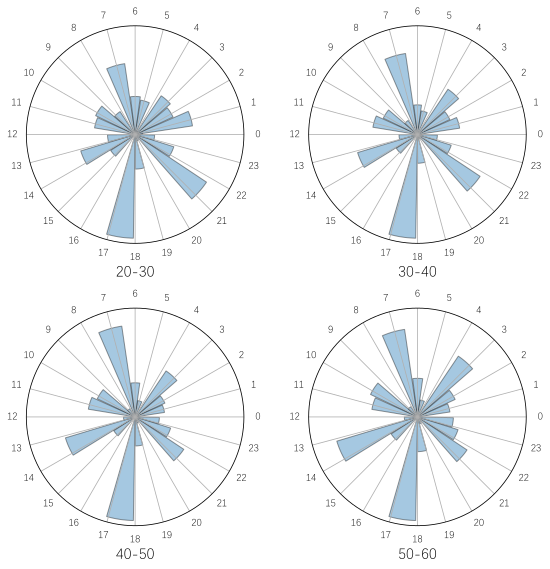

In [80]:
# 以出行结束时间（小时数）作为出行时刻,对每个年龄段绘制极坐标histogram（玫瑰图）
plt.figure(figsize=(8,8))
for i,ageRangeStr in enumerate(['20-30','30-40','40-50','50-60']):
    ax = plt.subplot(2,2,i+1,polar=True)
    theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)
    sns.distplot(trip.loc[trip['ageRange']==ageRangeStr,'stoptime_h'],bins=np.arange(0,24,1),ax=ax,kde=False,hist_kws={'ec':'k','width':(2*np.pi)/24})
    plt.xticks(theta,np.arange(0,24,1))
    plt.xlabel(ageRangeStr,fontsize=15)
    plt.yticks([])
plt.tight_layout()
plt.show()

* 由上图可以看出，这几个年龄段主要的出行时段均为**7时、13时、17时等三餐时段（上下班通勤及午餐时段）**
* 20-30及30-40年龄段用户**早间出行人数比例低于**40-50及50-60年龄段用户，**反映出年轻人爱睡懒觉的特点**
* 40-50及50-60年龄段用户在**晚间（21点至凌晨）出行人数比例远低于**20-30及30-40年龄段用户，推测原因是**年长的用户更注重养生的家庭生活，而年轻人则喜欢晚上出去浪**

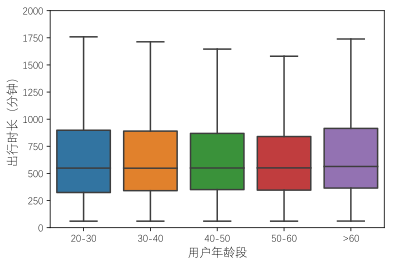

In [85]:
# 以出行时长为因变量,对每个年龄段绘制boxplot
plt.figure()
sns.boxplot(x='ageRange',y='tripduration',data=trip,fliersize=0,order=['20-30','30-40','40-50','50-60','>60'])
plt.ylim(ymin=0,ymax=2000)
plt.ylabel('出行时长（分钟）',fontsize=12)
plt.xlabel('用户年龄段',fontsize=12)
plt.show()

* 根据上图，我们认为**各年龄段用户的出行时长分布比较相似，不存在明显差异**

-----

>输出站点规模概况（summary）并绘制直方图。一个共享单车站点可以停几辆单车呢？

* 下表反映了站点数据中535个站的站点规模情况。
* 由表中数字可知，**最小的共享单车站点可容纳11辆单车，最大的站点则可以容纳47辆单车**。

In [52]:
station.dpcapacity.describe()

count    535.000000
mean      17.222430
std        5.430965
min       11.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       47.000000
Name: dpcapacity, dtype: float64


* 此外，一个有趣的现象是：在超过五百多个共享单车站点中，**绝大多数站点的单车容纳量均为奇数**。

In [55]:
np.unique(station.dpcapacity)

array([11, 15, 19, 20, 23, 27, 31, 35, 39, 43, 47], dtype=int64)

* 下图是由得到的站点数据绘制的站点单车容量频率直方图。
* 结合上述发现，从图中可以明显看到，**大部分的站点单车容量在15-19辆之间**。
* 少部分站点单车容量较低，为11辆
* 也有少部分站点单车容量高于20辆。

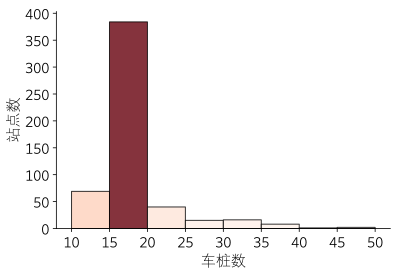

In [36]:
plt.figure()
sns.despine(ax=plt.gca())
N,_,patches = plt.hist(station.dpcapacity,bins=np.arange(10,55,5),alpha=0.8,ec='k')
# Color each bar by y-value
for yval,patch in zip(N,patches):
    patch.set_facecolor(plt.cm.Reds(yval/N.max()))
plt.xticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('车桩数',fontsize=15)
plt.ylabel('站点数',fontsize=15)
plt.show()

-----

>请按用户类型统计行程数，输出条形图。这个工作自行车系统，从使用量上来讲，哪个人群是主力呢，贡献了百分之多少的流量呢？

* 行程数据中共包含两类用户类型，分别是年费用户（认为是当地**居民**）及临时用户（认为是**游客**）。  
* 从2016年4月单车使用量上来看，当地居民是共享单车使用的主力，其使用量达**182,243人次，占比78.7%**；游客使用量达**49,392人次，占比22.3%**。

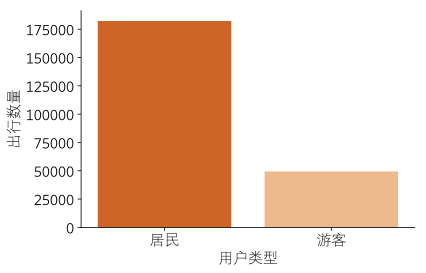

In [37]:
plt.figure()
sns.despine(ax=plt.gca())
totalSubscriberRec = sum(trip['usertype']=='Subscriber')
totalCustomerRec = sum(trip['usertype']=='Customer')
sns.barplot(x=['居民','游客'],y=[totalSubscriberRec,totalCustomerRec],palette='Oranges_r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.ylabel('出行数量',fontsize=15)
plt.xlabel('用户类型',fontsize=15)
plt.show()

* 根据数据中居民用户的性别信息，**男性居民是当地居民中共享单车使用的主力，占76.4%**，在当月共计出行139,270次
* **女性居民用户占居民使用量的23.6%, 当月共计出行42,947次**

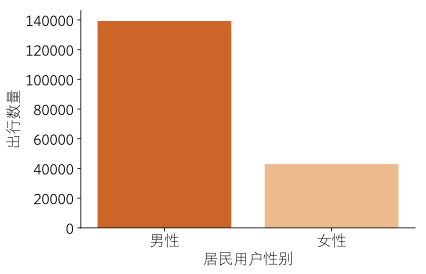

In [90]:
plt.figure()
sns.despine(ax=plt.gca())
totalSubscriberMale = sum(trip['gender']=='Male')
totalSubscriberFemale = sum(trip['gender']=='Female')
sns.barplot(x=['男性','女性'],y=[totalSubscriberMale,totalSubscriberFemale],palette='Oranges_r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.ylabel('出行数量',fontsize=15)
plt.xlabel('居民用户性别',fontsize=15)
plt.show()

-----

>自行车的命运是否也有不同呢？统计每辆自行车的使用次数，得到自行车日均使用次数直方图，并尝试解读。
>提示：平均每辆自行车一个内会会被使用几次呢？最小值，四分之一位数，中位数，四分之三位数，最大值又是多少？从这个角度看，你觉得这个共享单车系统的单车使用率怎么样？高还是低？说说你的分析。

In [98]:
# 利用pandas中的groupby方法，选择单车ID为主键值，制作使用情况概况统计表
# 进行月-日转化，得到单车日均使用情况
bikeUsage = trip.groupby(trip.bikeid).size()/30
bikeUsage.describe()

count    4537.000000
mean        1.701822
std         0.774885
min         0.033333
25%         1.166667
50%         1.733333
75%         2.233333
max         6.133333
dtype: float64


* 结合使用情况概况统计表及日均使用频率直方图，可以知道：
* 在2016年4月，数据中的单车日均使用次数的**中位数为1.73次**，**最低日均0.03次**（几乎没被使用过），**最高日均6.13次**
* 从图中可以看出，逾千辆单车每日会被使用**2次**左右。
* **当月该系统的平均单车使用率为1.7次/(辆日）**

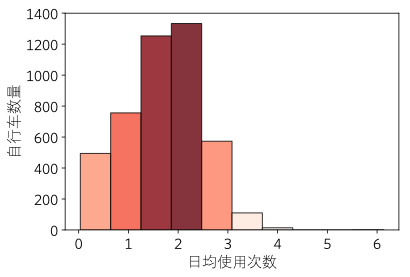

In [352]:
plt.figure()
N,_,patches = plt.hist(bikeUsage,alpha=0.8,ec='k')
# Color each bar by y-value
for yval,patch in zip(N,patches):
    patch.set_facecolor(plt.cm.Reds(yval/N.max()))
plt.xticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('日均使用次数',fontsize=15)
plt.ylabel('自行车数量',fontsize=15)
plt.show()

* 共享单车日均使用率随时间的变化情况如下图所示

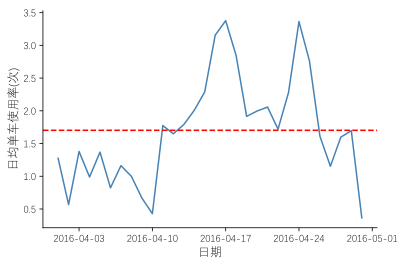

In [123]:
bikeUsage_daily = trip.resample('D',on='starttime').count()['trip_id']/bikeUsage.describe()['count']
plt.figure()
sns.despine(ax=plt.gca())
plt.plot(bikeUsage_daily.index,bikeUsage_daily.values,c='steelblue')
plt.ylabel('日均单车使用率(次)',fontsize=12)
plt.xlabel('日期',fontsize=12)
plt.axhline(y=bikeUsage.mean(),ls='--',c='r')
plt.show()

* 从上图中可以看出，2016年4月的共享单车出行数据中，**12日-26日的单车使用率均明显高于月平均值1.7次/辆日**
* 其中，**2016年4月17日及24日两个星期日的使用率达到了两次峰值**，单车使用率**超过3次/辆日**
* 其原因除与**周末出行人数自然波动**相关外，经搜索相关资料，推测与**MLB芝加哥Cub队比赛有关**

-----

> 请按天分析一日的时均借车量和还车量并绘制直方图，并解读结果。提示：共享单车的使用是否有早晚高峰，若有，分别是几点呢？

In [144]:
# 从月数据转换到小时，获得时均借还车辆信息
borrowUsage = trip.groupby(trip.starttime_h).size()/30/24
returnUsage = trip.groupby(trip.stoptime_h).size()/30/24

In [328]:
# 定义绘图函数，绘制时均借还车辆直方图  
def HourlyPlot(data=None,ylabel=None):
    '''
    Draw a hourly-based histogram
    -----------------------------
    Parameters
    -----------------------------
    data: (pd.Series) borrow/return usage series data
    ylabel: (str) label for y-axis in the output figure
    '''
    plt.figure()
    # Define colormap palette by data value
    pal = sns.color_palette("Reds_r", len(data))
    rank = data.argsort().argsort() 
    sns.barplot(x=data.index,y=data,palette=np.array(pal[::-1])[rank])
    plt.xticks(data.index[::2],data.index[::2],fontsize=15,**{'fontname':'WhitneyNumeric Book'})
    plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
    plt.xlabel('时间（小时）',fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.show()

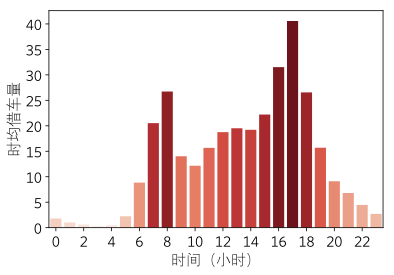

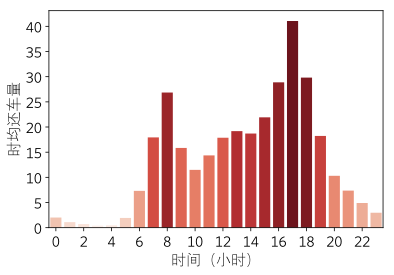

In [340]:
# 分别对借车量（borrowUsage）和还车量（returnUsage）作直方图
HourlyPlot(data=borrowUsage,ylabel='时均借车量')
HourlyPlot(data=returnUsage,ylabel='时均还车量')

* 由图中可以看出，共享单车的借还均存在日内波动，早高峰约出现在**早8时**，晚高峰出现于**晚17时**，均为**上下班高峰期**的重要时间段。

-----

>分用户类型统计周内日均还车量。至此，你应该充分掌握了绘制条形图的方法，
尝试将游客和居民的周内日均还车量绘制成条形图。理解不同用户类型的出行特点并解读。提示，工作日使用单车多，还是非工作日多？不同人群一样吗？

In [194]:
# 在行程表dataframe中，将游客与居民分开，单独进行分析
trip_Subscriber = trip[trip.usertype=='Subscriber']
trip_Customer = trip[trip.usertype=='Customer']

In [196]:
# 将月数据转化为周内数据
week_subs = trip_Subscriber.groupby(trip_Subscriber.starttime.dt.dayofweek).size()/4
week_cust = trip_Customer.groupby(trip_Customer.starttime.dt.dayofweek).size()/4

In [356]:
# 定义周内日均频率直方图绘图函数
def WeeklyPlot(data=None,title=None):
    '''
    Draw a weekly-based barplot, color of bar is commensurate with bar value
    ------------------------------------------------------------------------
    Parameters
    -----------------------------
    data: (pd.Series) Series usage data
    title: (str) title for output figure
    '''
    plt.figure()
    pal = sns.color_palette("Reds_r", len(data))
    rank = data.argsort().argsort() 
    sns.barplot(x=data.index,y=data,palette=np.array(pal[::-1])[rank])
    plt.xticks(data.index,
               ['一','二','三','四','五','六','日',],
               fontsize=15)
    plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
    plt.ylabel('日均借车量',fontsize=15)
    plt.xlabel('星期',fontsize=15)
    plt.title(title,fontsize=16)
    plt.show()

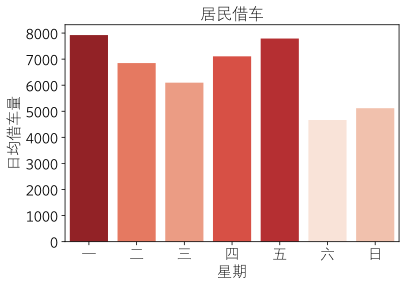

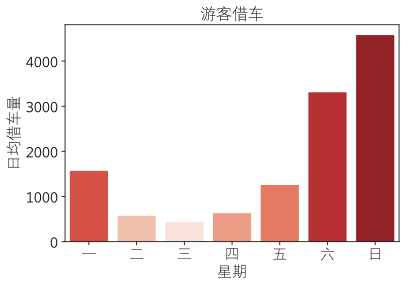

In [357]:
# 绘制按星期分类的日均借/还车量
WeeklyPlot(data=week_subs,title='居民借车')
WeeklyPlot(data=week_cust,title='游客借车')

* 由上两图可以看出，**居民**借车量主要集中于**工作日**，在周末则不如平日集中，可推断居民的租车用途主要是**日常通勤**；  
* 而**游客**借车则主要集中于**周末**，在工作日则用车量较少，可推断游客的租车行为模式主要是**游览观光**。
* 根据此，可建议共享单车维护方**于工作日注重维护、调配通勤目的地附近站点的单车，而于周末则注重游览目的地附近的单车**

-----

>统计用户出行时长分布，并计算按出行时长排序后，对应行程数占比的累计值，绘图并分析，这里你将学着分析累计密度图。提示：短行程多还是长行程多？是否有类似二八定律的发现？

In [217]:
# 将行程数据中，tripduration（出行时长）字段从秒转换为分钟值
trip_duration = trip.tripduration/60
trip_subs_duration = trip_Subscriber.tripduration/60
trip_cust_duration = trip_Customer.tripduration/60

* 由下表可以看出，**75%**用户的出行时长都分布于**18.5分钟**以内，但极少部分用户使用时间可长达约24h。

In [237]:
trip_duration.describe()

count    231635.000000
mean         15.707604
std          32.873385
min           1.000000
25%           6.350000
50%          10.933333
75%          18.566667
max        1436.433333
Name: tripduration, dtype: float64

* 使用*statmodels*中的经验累积分布函数（ECDF）计算出行时长的累积分布，也可以直观的看出：大部分用户的出行时长较短。

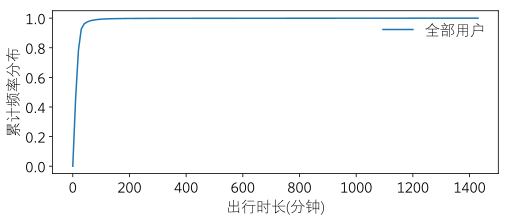

In [342]:
from statsmodels.distributions.empirical_distribution import ECDF
trip_ecdf = ECDF(trip_duration)
plt.figure(figsize=(8,3))
X = np.arange(0,trip_duration.max(),10)
plt.plot(X,trip_ecdf(X),label='全部用户')
plt.xticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('出行时长(分钟)',fontsize=15)
plt.ylabel('累计频率分布',fontsize=15)
plt.legend(frameon=False,fontsize=15)
plt.show()

* 下图中，使用了同样的方法对**游客**及**居民**的出行时长进行累积分布统计。  
游客的ECDF曲线（绿色）明显向下偏离了全体用户曲线（蓝色），代表游客倾向于使用共享单车进行**长行程**的活动；  
而居民的ECDF曲线（橙色）则正好与游客相反，向上偏离了全体用户曲线（蓝色），反映出居民大多使用共享单车进行**短行程**的活动。

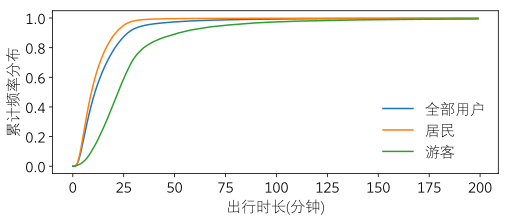

In [343]:
trip_subs_ecdf = ECDF(trip_subs_duration)
trip_cust_ecdf = ECDF(trip_cust_duration)
plt.figure(figsize=(8,3))
X = np.arange(0,200,1)
plt.plot(X,trip_ecdf(X),label='全部用户')
X = np.arange(0,200,1)
plt.plot(X,trip_subs_ecdf(X),label='居民')
X = np.arange(0,200,1)
plt.plot(X,trip_cust_ecdf(X),label='游客')
plt.xticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=15,**{'fontname':'WhitneyNumeric Book'})
plt.xlabel('出行时长(分钟)',fontsize=15)
plt.ylabel('累计频率分布',fontsize=15)
plt.legend(frameon=False,fontsize=15)
plt.show()

* 从居民与游客出行时长的概要统计表中也可以看出，**游客用车的中位数时长为22.3分钟，远高于居民用车时长中位数9.2分钟。**

In [361]:
trip_subs_duration.describe()

count    182243.000000
mean         11.660348
std          21.487564
min           1.000000
25%           5.650000
50%           9.166667
75%          14.750000
max        1389.833333
Name: tripduration, dtype: float64


In [362]:
trip_cust_duration.describe()

count    49392.000000
mean        30.640877
std         55.506777
min          1.000000
25%         14.750000
50%         22.300000
75%         31.250000
max       1436.433333
Name: tripduration, dtype: float64


------

>这里你将学习如何把两张表的数据关联起来，得到新发现。分别打印出居民女性、居民男性和游客还车量前三的站点及其经纬度。猜猜这些站点流量大的原因是什么？提示：你可以借助网络，了解下这些站点及其地理位置

In [258]:
# 获取全部站点流量排名数据
tripsToStation = trip.groupby(trip['to_station_id']).count().sort_values('trip_id',ascending=False).trip_id

In [276]:
# 使用站点ID，在station数据表中获得站点经纬度；与站点流量合并，构造用于绘图的数据
station_ids = tripsToStation.index.values
lat = [(station.latitude[station.id==sid].values[0]) for sid in station_ids]
lon = [(station.longitude[station.id==sid].values[0]) for sid in station_ids]
data = [[lat[i],lon[i],tripsToStation[sid]] for i,sid in enumerate(station_ids)] 

In [289]:
# 使用folium包，对数据中全部站点流量进行可视化（热图）
import folium
from folium.plugins import HeatMap
# location: center of map; zoom_start: zoom level when start
map_osm = folium.Map(location=[41.8693,-87.6475],zoom_start=11)
# Draw HeatMap
HeatMap(data,min_opacity=0.1,radius=5).add_to(map_osm)
# Show map
map_osm

In [241]:
# 对男性用户/女性用户/游客用户还车流量最高的三个站点进行可视化
# 对行程表根据性别进行切片
trip_male = trip[trip.gender=='Male']
trip_female = trip[trip.gender=='Female']

In [254]:
# 对男性/女性/游客用户分别获取流量最高的三个站点
Top3ReturnID_male = trip_male.groupby(trip_male['to_station_id']).count().sort_values('trip_id',ascending=False).index[:3].values
Top3ReturnID_female = trip_female.groupby(trip_female['to_station_id']).count().sort_values('trip_id',ascending=False).index[:3].values
Top3ReturnID_cust = trip_Customer.groupby(trip_Customer['to_station_id']).count().sort_values('trip_id',ascending=False).index[:3].values

In [298]:
# 定义函数，由站点ID获取站点经纬度信息
def getPoiLatLon(station_ids=None):
    '''
    Return Point-of-Interest location data by station ID array
    ------------------------------------------------------------------------
    Parameters
    -----------------------------
    station_ids: (np.array) an array includes poi station IDs
    '''
    lat = [(station.latitude[station.id==sid].values[0]) for sid in station_ids]
    lon = [(station.longitude[station.id==sid].values[0]) for sid in station_ids]
    poi_data = [[lat[i],lon[i]] for i in range(len(station_ids))] 
    return poi_data

In [299]:
# 分类别获取流量最高的三个站点的经纬度
poi_data_top3_male = getPoiLatLon(station_ids=Top3ReturnID_male)
poi_data_top3_female = getPoiLatLon(station_ids=Top3ReturnID_female)
poi_data_top3_cust = getPoiLatLon(station_ids=Top3ReturnID_cust)

In [300]:
# 定义函数，在地图上添加地标
def addMarker(onMap=None,poi_data=None,popupMsg=None,iconColor=None):
    '''
    Add Markers on specified folium map
    ------------------------------------
    Parameters
    ------------------------------------
    onMap: folium map object
    poi_data: (np.array) a 2D array includes POIs([latitude,longitude])
    popupMsg: (list of str) Marker Pop-Up Messages. Length should be consistent with poi_data.
    iconColor: (str) Marker Color
    '''
    for i,ipoi in enumerate(poi_data):
        folium.Marker(ipoi,
                      popup=popupMsg[i],
                      icon=folium.Icon(color=iconColor)
                     ).add_to(onMap)

**通过对男性/女性/游客用户流量最高的三个还车点进行可视化分析，我们可以得出以下结论：**
* 男性用户流量最高的三个还车点**十分集中**，均位于*Ogilvie Transportation Center*附近，反映了男性用户**通勤**的需求
* 女性用户流量最高的三个还车点**较为分散**，但三个还车点附近均为**购物区**（CVS,theMART,TraderJoe's等），反映了女性用户**购物**的需求
* 游客用户流量最高的三个还车点**均位于密西根湖边风景区**，充分反映了游客用户**观光旅游**的需求

In [305]:
map_osm = folium.Map(location=[41.878,-87.6375],
                     zoom_start=13)
addMarker(onMap=map_osm,
          poi_data=poi_data_top3_male,
          popupMsg=['男性用户Top1还车点','男性用户Top2还车点','男性用户Top3还车点'],
          iconColor='blue')
addMarker(onMap=map_osm,
          poi_data=poi_data_top3_female,
          popupMsg=['女性用户Top1还车点','女性用户Top2还车点','女性用户Top3还车点'],
          iconColor='red')
addMarker(onMap=map_osm,
          poi_data=poi_data_top3_cust,
          popupMsg=['游客Top1还车点','游客Top2还车点','游客Top3还车点'],
          iconColor='green')
map_osm